In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bench.csv',index_col=0)

In [3]:
df.head()

,naive-order,partition-order,naive,partition
nonwheeler2,0.002221,0.002156,NaN,NaN
nonwheeler3,0.001741,0.001488,0.645436,0.659197
nonwheeler4,0.001800,0.001800,0.586502,0.604752
nonwheeler5,0.004348,0.002047,0.050809,0.037588
nonwheeler6,0.003061,0.002420,NaN,NaN


In [4]:
trie_df = df.loc[df.index.str.contains('trie')]
trie_df.head()

,naive-order,partition-order,naive,partition
trie,NaN,NaN,0.814613,0.704957
trie2,0.00271,0.001415,0.022534,0.020037
trie3,7.47678,0.371760,7.529050,0.522940
trie4,0.47951,0.033987,0.634947,0.070526


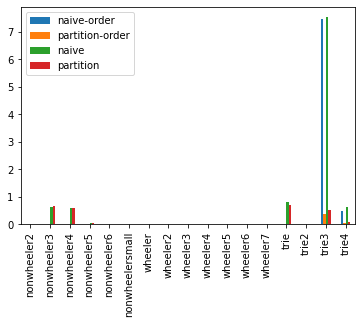

In [5]:
df.plot(kind='bar',rot=90)

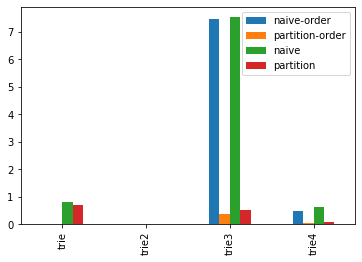

In [6]:
trie_df.plot(kind='bar',rot=90)